In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re           
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from bs4 import BeautifulSoup 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


import warnings
warnings.filterwarnings("ignore")

# The DataSet taken Is from MetaBase Link :- 
https://metabase.lidolearning.com/question/2677?start_date=2020-10-01&end_date=2020-10-03

In [3]:
data = pd.read_csv('./Dataset/reviews(1-14).csv')

In [4]:
data.head()

,product_feedback,product_rating,teacher_id,teacher_name,teacher_rmn,vc_id,start_time,count_students,student_ids,student_names,student_rmns
0,1. Most of the times the screen share option c...,1.0,28e89e38-fb05-4082-84aa-1f9443d43383,Lalit Upadhyay,9004097187,4fc2f040-aaef-4e2e-9c9d-101d3f5b7bc6,2020-09-05T16:00:00+05:30,3,"{76dd93d7-0336-4e49-b3bd-1fe92e6ca289,9af94c6c...","{Sachi,SAKSHAM,Tanesh}","{8018256529,8126414600,9027917598}"
1,aaditya tried everything but his mic did not w...,1.0,f09c9aef-c221-4858-b0b6-cfee341fa761,Vasundhara Guleria,8264861796,0c964071-5fc0-42a0-a6a9-d42cc59e0f61,2020-09-12T13:00:00+05:30,4,"{2543fa86-1748-4b31-a8ca-7040943f791e,5b471717...","{ADITYA,AWADH,KAVERI,""Zara Khan ""}","{8387977000,9399073915,9587358465,9878138080}"
2,activities are not visible\n,1.0,06611ce3-2636-4060-8fe6-beff2a09a7c0,Meenakshi Nagpal,7988189284,41266605-d286-421f-be95-ed0423ba1d1d,2020-09-05T11:00:00+05:30,3,"{191a5fc4-debe-4108-adab-18e8bfe2ddcc,329d4597...","{HARSHPREET,""Palak goel "",SINCHANA}","{6239228140,9311489275,9740879988}"
3,"Anurag is having least intrest in this class, ...",1.0,d73677b0-7f22-4028-8a76-1dcec5347ab4,Nirmal Kumar Singh,8982753944,cfc68463-3c65-4a9f-80fa-d0ad52ba136f,2020-09-09T18:00:00+05:30,3,"{5200eb31-49ec-4a2c-9170-4660d25e931b,523bf469...","{""Anurag "",""Ayan Ansari"",Karthik}","{7275767144,8979812304,9133095437}"
4,At end of the class. I and aliza both face som...,1.0,55aebf7f-6a90-491e-931d-3e0e0666dca8,Riya Makhani,6353905546,61c64a19-4c80-4fd3-a67f-58e69037c1fb,2020-09-02T16:00:00+05:30,1,{5407c90c-ab9c-4228-b2a0-071d8e3d496f},{ALIZAA},{7417134771}


In [5]:
data.shape

(3311, 11)

In [6]:
data.dtypes

product_feedback     object
product_rating      float64
teacher_id           object
teacher_name         object
teacher_rmn           int64
vc_id                object
start_time           object
count_students        int64
student_ids          object
student_names        object
student_rmns         object
dtype: object

In [7]:
data.isnull().sum()

product_feedback    2144
product_rating       869
teacher_id             0
teacher_name           0
teacher_rmn            0
vc_id                  0
start_time             0
count_students         0
student_ids            0
student_names          0
student_rmns           0
dtype: int64

In [8]:
data.describe

<bound method NDFrame.describe of                                        product_feedback  product_rating  \
0     1. Most of the times the screen share option c...             1.0   
1     aaditya tried everything but his mic did not w...             1.0   
2                         activities are  not visible\n             1.0   
3     Anurag is having least intrest in this class, ...             1.0   
4     At end of the class. I and aliza both face som...             1.0   
...                                                 ...             ...   
3306                                                NaN             NaN   
3307                                                NaN             NaN   
3308                                                NaN             NaN   
3309                                                NaN             NaN   
3310                                                NaN             NaN   

                                teacher_id        teacher_name  t

### Total Rating including Null Values 

<AxesSubplot:xlabel='rating_with_NA', ylabel='count'>

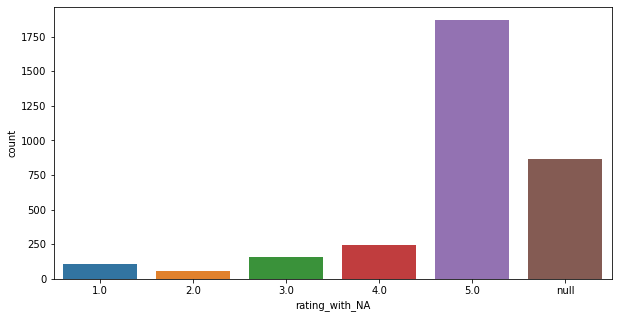

In [9]:
plt.figure(figsize=(10,5))
data["rating_with_NA"] = data['product_rating'].fillna('null')
sns.countplot(data['rating_with_NA'])

### Total Reviews including Null Values 

Text(0.5, 0, 'Null Reviews')

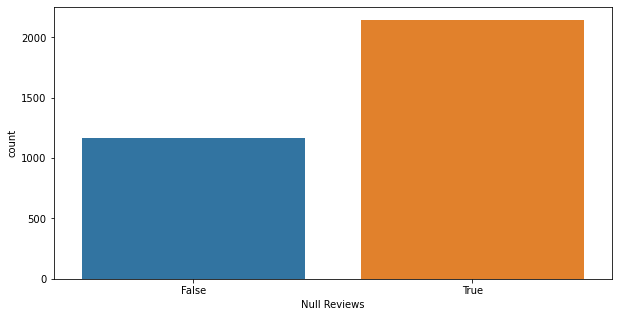

In [10]:
plt.figure(figsize=(10,5))
ax =sns.countplot(data['product_feedback'].isnull())
ax.set_xlabel(xlabel="Null Reviews")

In [11]:
data = data.dropna(subset=['product_feedback'])

### WordCloud

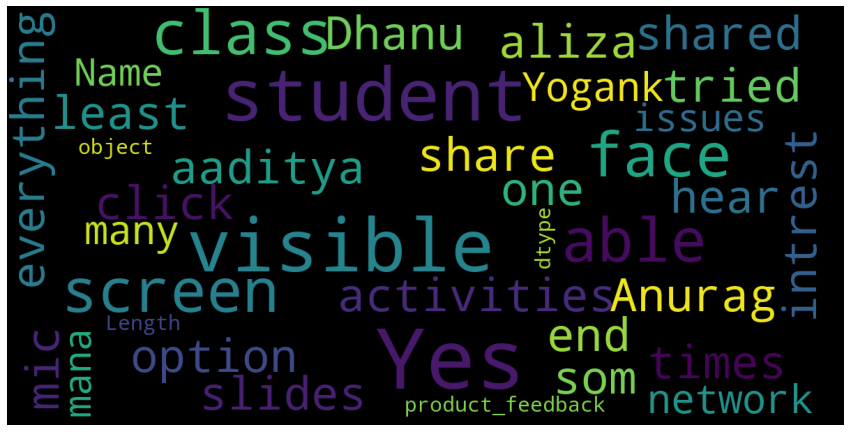

In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['product_feedback'])

### Reviews_length and Number of reviews respect to Product_rating

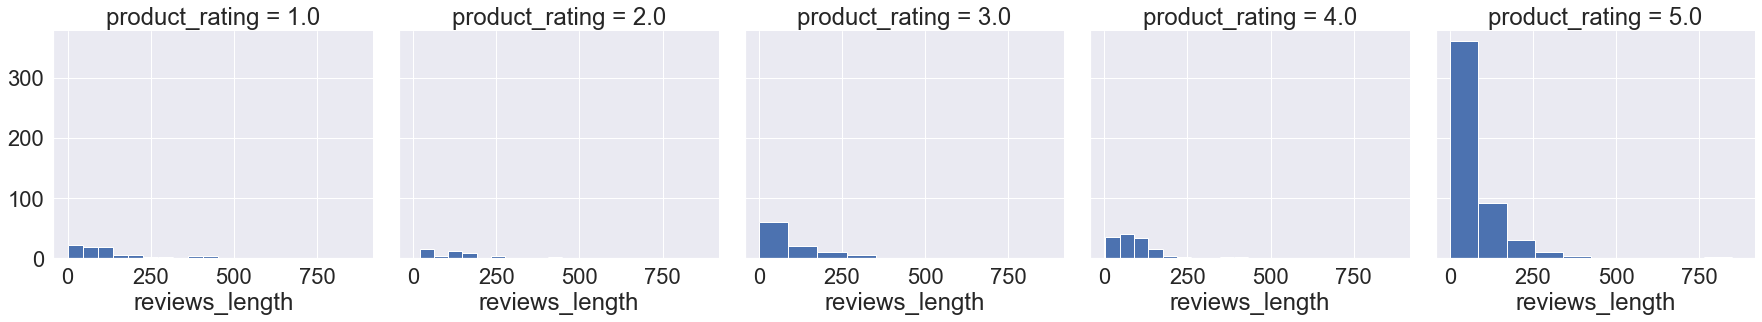

In [13]:
data['reviews_length']=data['product_feedback'].apply(len)
sns.set(font_scale=2.0)

g = sns.FacetGrid(data,col='product_rating',size=5)
g.map(plt.hist,'reviews_length')

## Correlation Plot

<AxesSubplot:>

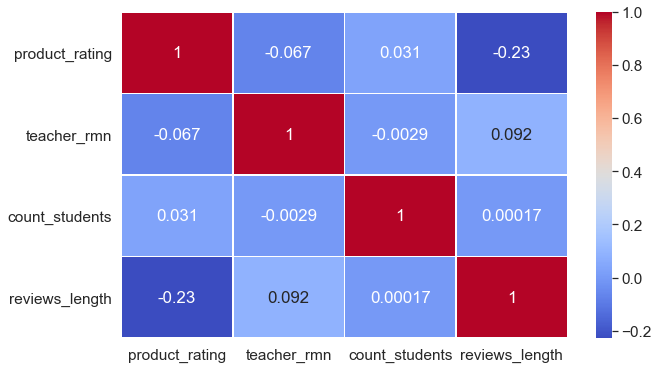

In [14]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [15]:
all_text = data['product_feedback']
for i in range(min(10, len(all_text))):
    print(all_text[i])
    print("#========================================#")

1. Most of the times the screen share option creates technical issues and ruins the class. (Even when network is good).
2. Student (Saksham, Grade 7, Maths) had some issue after I tried sharing screen, he turned offline and was not able to re-login.
3. Game website on slide number 10 - (https://in.mathgames.com/skill/7.8-multiply-fractions) always takes a lot of time in opening.
#========================================#
aaditya tried everything but his mic did not work, kaveri was not near the screen but could hear her talking in the background  
#========================================#
activities are  not visible

#========================================#
Anurag is having least intrest in this class, but he is more focus on class book problem. I solve some .
Kartik join late but great student , weak in some sort of calculation.
#========================================#
At end of the class. I and aliza both face some networking issues. But I managed it and try to complete the clas

### Reviews_length and Number of reviews respect to product_rating and Count students in class

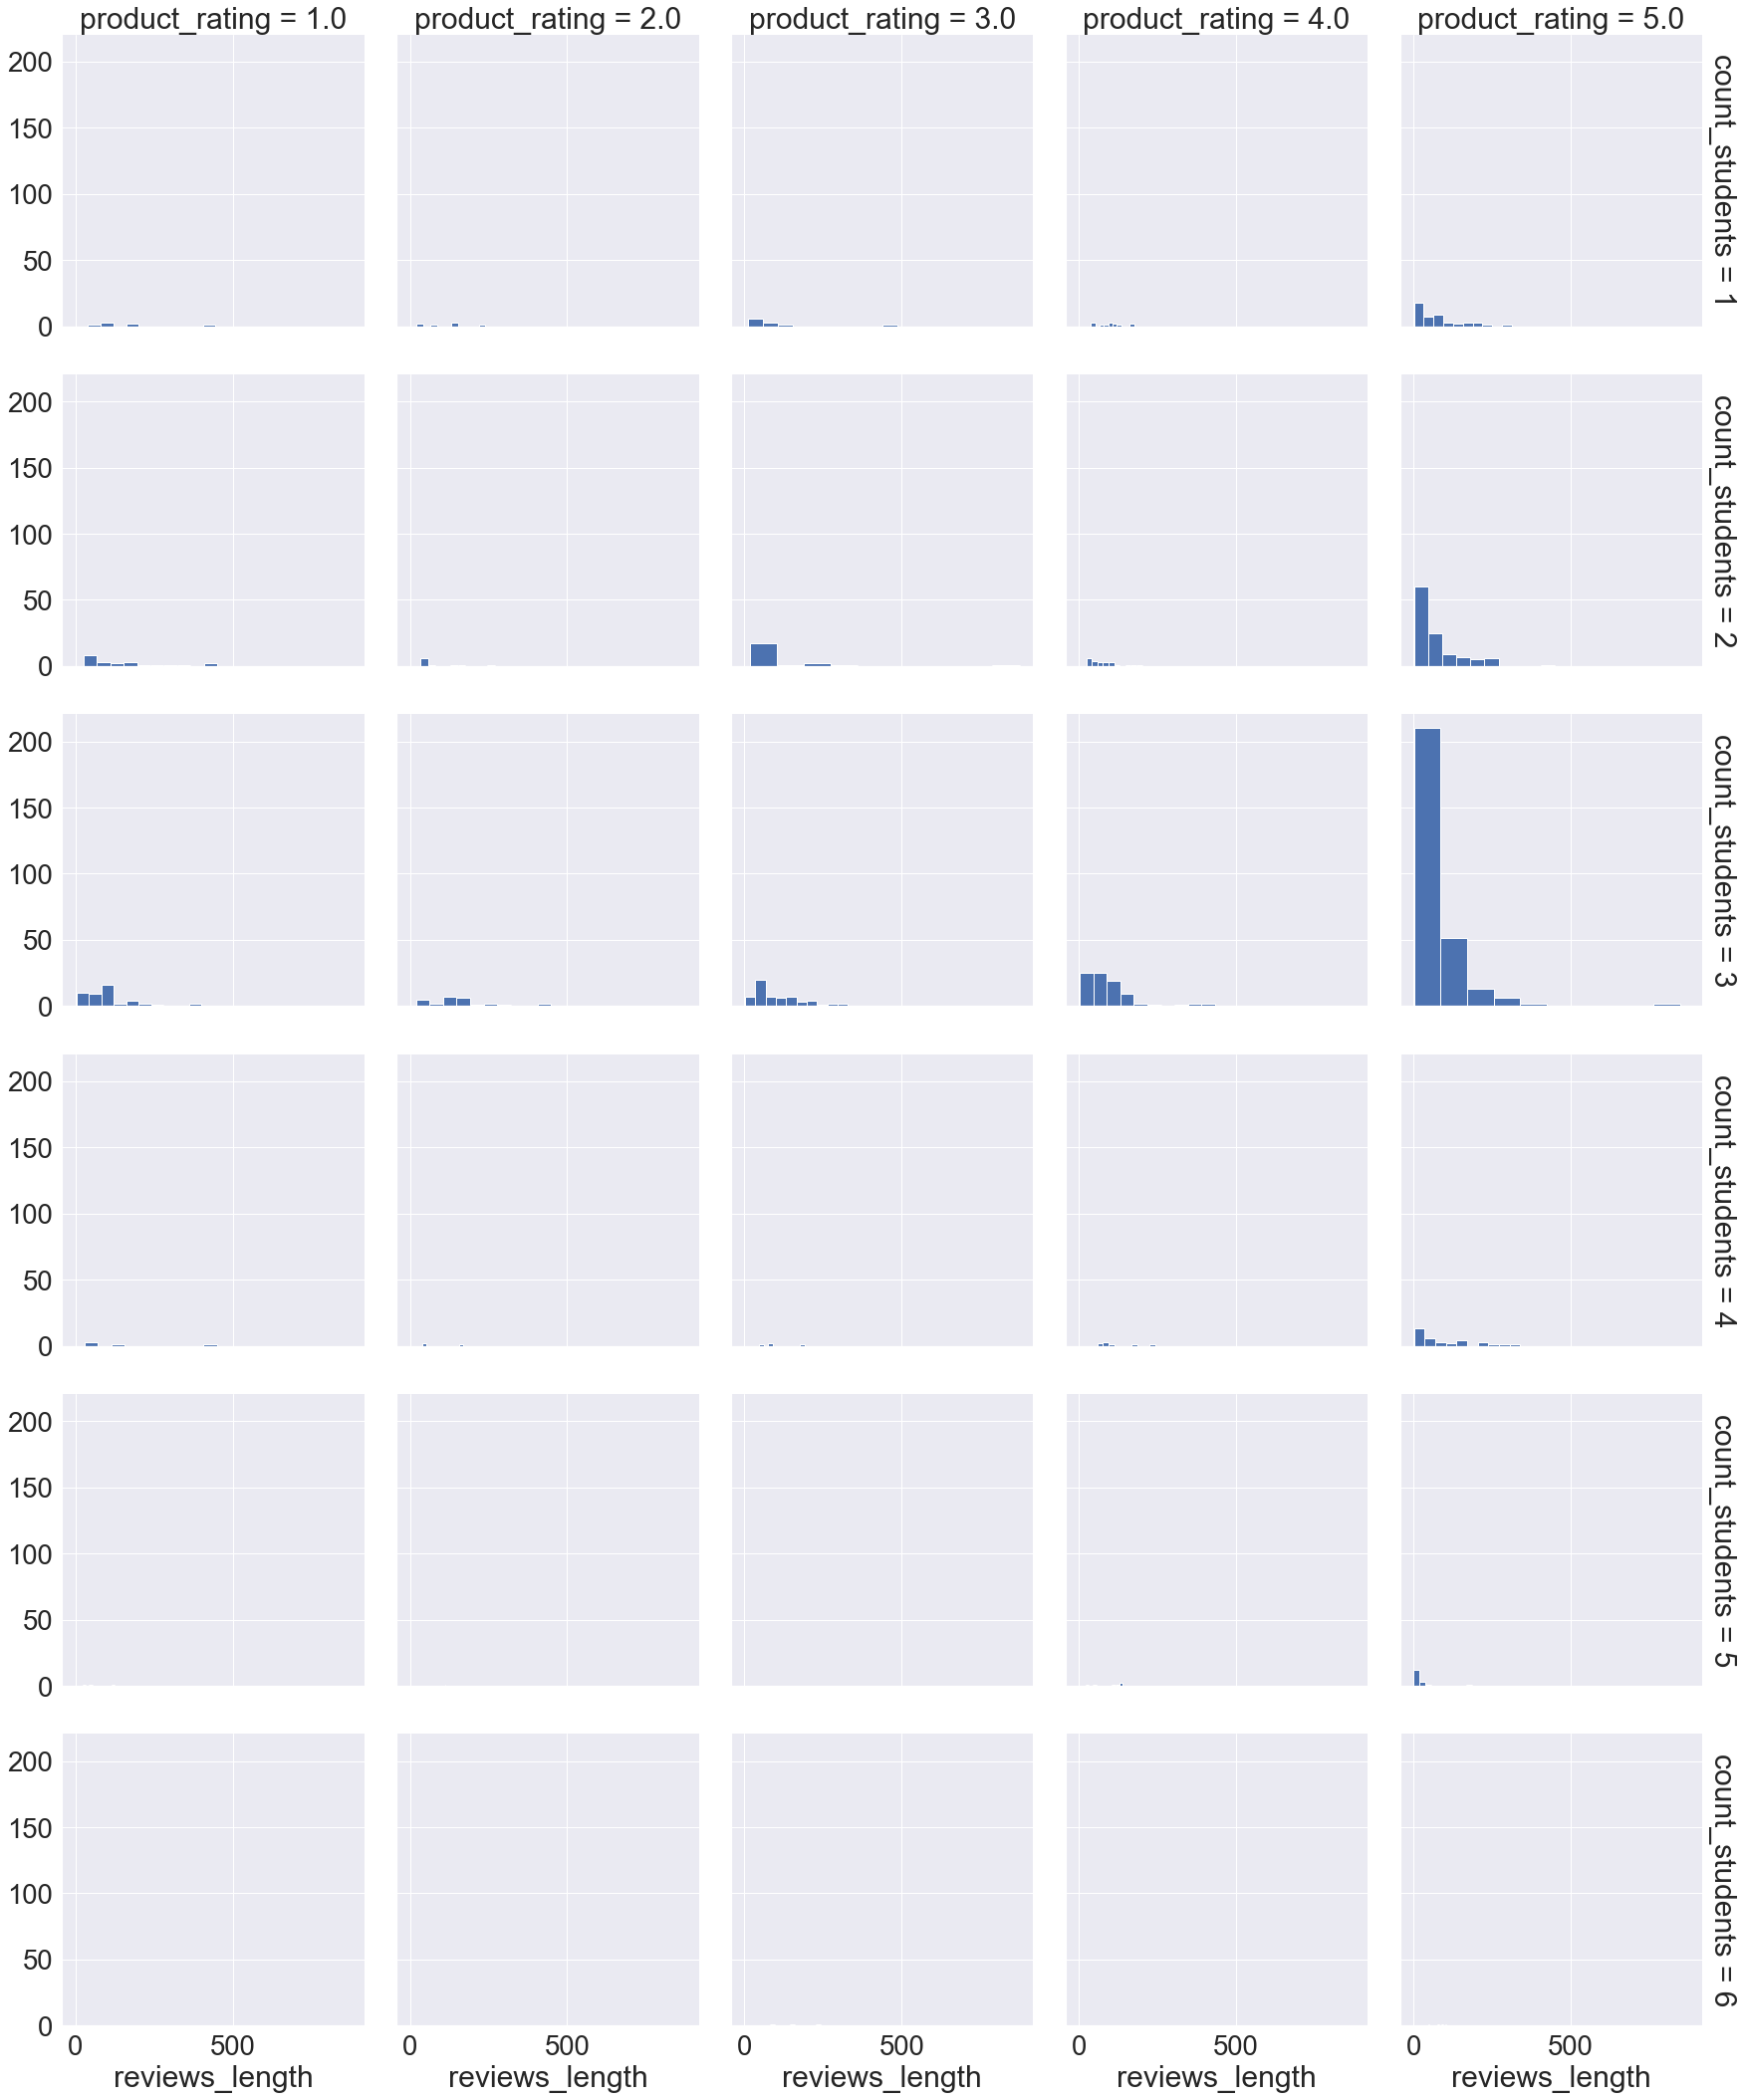

In [16]:
sns.set(font_scale=2.5)

g = sns.FacetGrid(data,col='product_rating', row= 'count_students',size=5, margin_titles=True)
g.map(plt.hist,'reviews_length')

### overall_avg_rating and overall_avg_reviews_lenght(char-wise)

In [17]:
overall_avg_rating = data["product_rating"].mean(skipna = True)
overall_avg_reviews_length = data["reviews_length"].mean(skipna = True)
print("overall_avg_rating: {}, overall_avg_reviews_length: {}".format(overall_avg_rating, overall_avg_reviews_length) )

overall_avg_rating: 4.065972222222222, overall_avg_reviews_length: 85.79777206512425


In [18]:
avg_feedback_length_per_teacher = data.groupby("teacher_name").agg({"reviews_length" : np.mean})
avg_feedback_length_per_teacher

,reviews_length
teacher_name,
Aanchal Chopra,15.400000
Aayushi Kumari,53.333333
Abhimanyu Chaudhary,192.000000
Abhishek Sharma,61.500000
Abhishikta,55.666667
...,...
Vignesh M,105.142857
Vivek Gaurav,101.000000
Vivek Surve,63.000000


In [19]:
avg_feedback_length_per_teacher.sort_values(by='reviews_length', ascending=False, na_position='last')

,reviews_length
teacher_name,
Madhura Mohan,340.000000
Nitika Jain,332.000000
Mansi Patel,308.900000
Sakshi Malav,277.000000
Nayana A R,248.000000
...,...
Jalaj Srivastava,10.647059
Meenakshi Nagpal,9.875000
Maitrey Choudhary,4.769231


In [20]:
avg_rating_per_teacher = data.groupby("teacher_name").agg({"product_rating" : np.mean})
avg_rating_per_teacher

,product_rating
teacher_name,
Aanchal Chopra,4.40
Aayushi Kumari,2.50
Abhimanyu Chaudhary,3.25
Abhishek Sharma,1.00
Abhishikta,1.00
...,...
Vignesh M,3.00
Vivek Gaurav,NaN
Vivek Surve,5.00


## Text Cleaning

In [21]:
##### Text Cleaning ######

#No of words in reviews
data['number_of_words'] = data.product_feedback.apply(lambda x: len(x.split()))

# Remove Cleaned Feedback
index_names = data[ data['number_of_words'] <= 4  ].index
data.drop(index_names, inplace = True) 

# Lower
data['cleaned_feedback'] = data['product_feedback'].str.lower() 

# Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: remove_urls(text))

# Remove Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: remove_punctuation(text))

In [22]:
data.shape

(853, 15)

## Word Net Lemmatizer

In [23]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: lemmatize_words(text))

## Correcting Spelling Mistakes

In [24]:
# NOTE: WILL TAKE SOME TIME TO COMPLETE (SLOW PROCESS 5-10min)
# A good Idea would be to export the DATA to CSV to Avoid this step Again and again

from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: correct_spellings(text))

In [25]:
data['cleaned_feedback']

0       1 most of the time the screen share option cre...
1       aaditya try everything but his mic do not work...
3       aura be have least interest in this class but ...
4       at end of the class i and liza both face some ...
5       at first my mic be not work so i ask to reload...
                              ...                        
2744    yes the screen that be share be not visible to...
2745             yes the slide be not visible for student
2746    yes the student dhani be not able to hear me e...
2747    yes the student be not able to click one of th...
2748    logan face so many network issue but i manage ...
Name: cleaned_feedback, Length: 853, dtype: object

## Sentiment Analysis

In [26]:
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions

In [29]:
natural_language_understanding = NaturalLanguageUnderstandingV1(                                         
    version='2020-08-01',
    iam_apikey='bXSAw6fRZRB4OJCfBNQgnGdH-h3KrkNs-bftWJwrbx73', # Use your API key here
    url='https://api.kr-seo.natural-language-understanding.watson.cloud.ibm.com/instances/0fcf4d52-23ce-47cc-ba82-d9f47e3735fe'
    )
def Sentiment_score(input_text): 
    # Input text can be sentence, paragraph or document
    response = natural_language_understanding.analyze (
    text = input_text,
    features = Features(sentiment=SentimentOptions()), language='en').get_result()
    # From the response extract score which is between -1 to 1
    res = response.get('sentiment').get('document').get('score')
    return res

def Categories(input_text): 
    # Input text can be sentence, paragraph or document
    
    response = natural_language_understanding.analyze (
    text = input_text,
    features = Features(categories=CategoriesOptions(limit=3)), language='en').get_result()
    
    # From the response extract score which is between -1 to 1
    score = response.get('categories')#.get('score')
    #label = response.get('categories').get('label')
    return score#,lable

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-f95ede82377b>:1: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  natural_language_understanding = NaturalLanguageUnderstandingV1(


D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


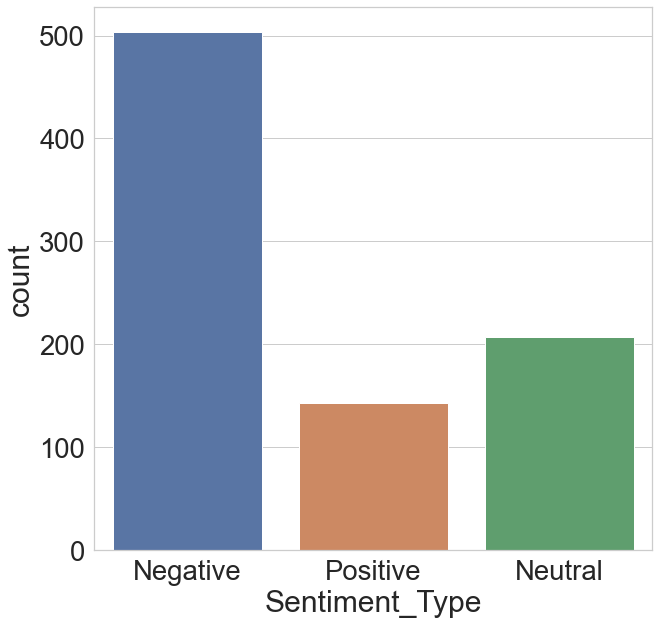

In [30]:
list_desc = list()

df = data['cleaned_feedback'].astype(str)

def f(df):
    if df['sentiment'] > 0:
        val = "Positive"
    elif df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

for row in df:
    list_desc.append((row, Sentiment_score(row)))
    df = pd.DataFrame(list_desc, columns = ['sentence','sentiment'])
    

df['Sentiment_Type'] = df.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df)

In [31]:
df

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentence,sentiment,Sentiment_Type
0,1 most of the time the screen share option cre...,-0.882468,Negative
1,aaditya try everything but his mic do not work...,-0.810417,Negative
2,aura be have least interest in this class but ...,-0.541781,Negative
3,at end of the class i and liza both face some ...,0.996917,Positive
4,at first my mic be not work so i ask to reload...,-0.969891,Negative
...,...,...,...
848,yes the screen that be share be not visible to...,0.681424,Positive
849,yes the slide be not visible for student,0.000000,Neutral
850,yes the student dhani be not able to hear me e...,-0.896833,Negative
851,yes the student be not able to click one of th...,-0.753344,Negative


In [32]:
data.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

data = pd.concat( [data, df], axis=1) 

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
data.head()

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_feedback,product_rating,teacher_id,teacher_name,teacher_rmn,vc_id,start_time,count_students,student_ids,student_names,student_rmns,rating_with_NA,reviews_length,number_of_words,cleaned_feedback,sentence,sentiment,Sentiment_Type
0,1. Most of the times the screen share option c...,1.0,28e89e38-fb05-4082-84aa-1f9443d43383,Lalit Upadhyay,9004097187,4fc2f040-aaef-4e2e-9c9d-101d3f5b7bc6,2020-09-05T16:00:00+05:30,3,"{76dd93d7-0336-4e49-b3bd-1fe92e6ca289,9af94c6c...","{Sachi,SAKSHAM,Tanesh}","{8018256529,8126414600,9027917598}",1,381,61,1 most of the time the screen share option cre...,1 most of the time the screen share option cre...,-0.882468,Negative
1,aaditya tried everything but his mic did not w...,1.0,f09c9aef-c221-4858-b0b6-cfee341fa761,Vasundhara Guleria,8264861796,0c964071-5fc0-42a0-a6a9-d42cc59e0f61,2020-09-12T13:00:00+05:30,4,"{2543fa86-1748-4b31-a8ca-7040943f791e,5b471717...","{ADITYA,AWADH,KAVERI,""Zara Khan ""}","{8387977000,9399073915,9587358465,9878138080}",1,128,23,aaditya try everything but his mic do not work...,aaditya try everything but his mic do not work...,-0.810417,Negative
2,"Anurag is having least intrest in this class, ...",1.0,d73677b0-7f22-4028-8a76-1dcec5347ab4,Nirmal Kumar Singh,8982753944,cfc68463-3c65-4a9f-80fa-d0ad52ba136f,2020-09-09T18:00:00+05:30,3,"{5200eb31-49ec-4a2c-9170-4660d25e931b,523bf469...","{""Anurag "",""Ayan Ansari"",Karthik}","{7275767144,8979812304,9133095437}",1,175,34,aura be have least interest in this class but ...,aura be have least interest in this class but ...,-0.541781,Negative
3,At end of the class. I and aliza both face som...,1.0,55aebf7f-6a90-491e-931d-3e0e0666dca8,Riya Makhani,6353905546,61c64a19-4c80-4fd3-a67f-58e69037c1fb,2020-09-02T16:00:00+05:30,1,{5407c90c-ab9c-4228-b2a0-071d8e3d496f},{ALIZAA},{7417134771},1,179,36,at end of the class i and liza both face some ...,at end of the class i and liza both face some ...,0.996917,Positive
4,"at first, my mic was not working so I asked to...",1.0,92d28ccc-442f-4b22-8b2b-59d4c08471de,Shafiq Ur Rehman,9999094192,9c54d54c-c94c-4b5a-a2d6-f8467972325b,2020-09-02T18:00:00+05:30,1,{6ec42414-9846-4be8-91d9-6390985169a1},{SANU},{7906733631},1,188,37,at first my mic be not work so i ask to reload...,at first my mic be not work so i ask to reload...,-0.969891,Negative


### Sentiment Per Teacher

In [34]:
avg_emotion_per_teacher = data.groupby("teacher_name").agg({"sentiment" : np.mean})
avg_emotion_per_teacher.sort_values(by="sentiment", ascending=False, na_position='last')

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment
teacher_name,
Ankita pandey,0.782206
Namira Kadri,0.496903
Himanshu Manral,0.488506
Bonuga Mounya,0.436571
Navneet Khubber,0.385663
...,...
Mohanraj R,-0.907782
Anas khan,-0.919206
Soumodeep Bhowmick,-0.922152


In [35]:
avg_emotion_per_teacher.sort_values(by="sentiment", ascending=False, na_position='last').head()

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment
teacher_name,
Ankita pandey,0.782206
Namira Kadri,0.496903
Himanshu Manral,0.488506
Bonuga Mounya,0.436571
Navneet Khubber,0.385663


In [36]:
avg_emotion_per_teacher.sort_values(by="sentiment", ascending=False, na_position='last').tail(10)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment
teacher_name,
Priyanka Maitra,-0.882445
Samiksha,-0.892058
Sanchit Tolpadi,-0.901877
Alisha Ahmed,-0.903277
Sudha Rani,-0.904161
Mohanraj R,-0.907782
Anas khan,-0.919206
Soumodeep Bhowmick,-0.922152
Rohit Ramesh,-0.930835


D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='rating_with_NA', ylabel='count'>

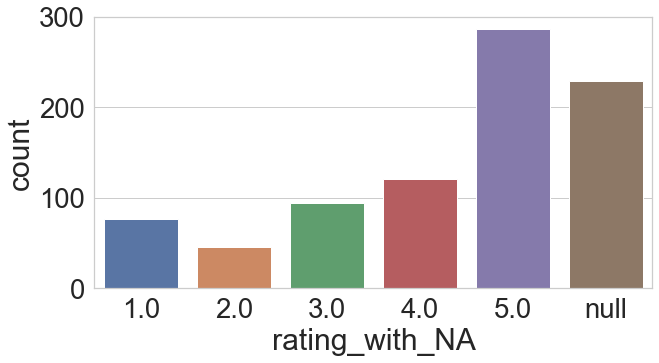

In [37]:
plt.figure(figsize=(10,5))
data["rating_with_NA"] = data['product_rating'].fillna('null')
sns.countplot(data['rating_with_NA'])

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


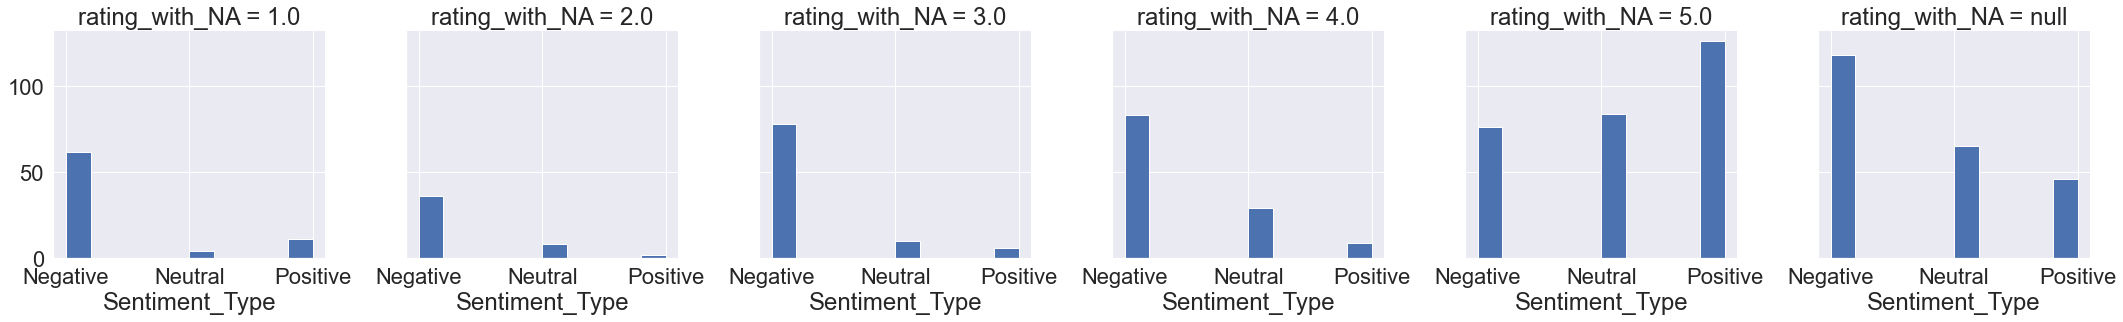

In [38]:

sns.set(font_scale=2.0)

g = sns.FacetGrid(data,col='rating_with_NA',size=5, margin_titles=True)
g.map(plt.hist,'Sentiment_Type')

In [39]:
pd.set_option('display.max_colwidth', -1)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
data[['product_feedback','product_rating','Sentiment_Type']].sample(10, random_state = 100)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_feedback,product_rating,Sentiment_Type
824,The student name was Gulnas and not Aditya.,NaN,Neutral
489,No Technical issue from my side.\nThe student had some issues with internet connectivity. He was very happy to be in the class and was very excited. Please call the parents as they are interest to join.,5.0,Positive
509,"Pari was very much interested but due to network issues, she had audio problems - most of the time I could not hear her and some times she could nit hear me. She wants to repeat the demo.",5.0,Negative
134,"Facing screen issues again, especially at the last slide.",3.0,Negative
376,"Both the kids were good, Darshan had a lot of background noise.",5.0,Positive
458,"Manya joined the class on time , but i was not able to hear her , she got the class rescheduled . Khwaish joined the class 30mins late , we talked a little , advised him to reschedule .",5.0,Negative
574,Sumit and Vishal had very high engagement in spite of technical problems as they could not do all the external activities.,5.0,Negative
731,Nikitha joined using a tab and had very poor connectivity.,NaN,Negative
641,Ashlesha parents were not there .I explained Ashlesha in detail about Lido way of learning,NaN,Neutral
384,"call parents , his mom wants to know the fee structure.\nThanking you",5.0,Positive


In [41]:
avg_feedback_length_per_teacher = data.groupby("teacher_name").agg({"number_of_words" : np.mean})
avg_feedback_length_per_teacher['number_of_words']

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


teacher_name
Aanchal Chopra         7.000000 
Aayushi Kumari         10.000000
Abhimanyu Chaudhary    36.846154
Abhishek Sharma        11.000000
Abhishikta             11.333333
                         ...    
Vignesh M              21.333333
Vivek Gaurav           16.000000
Vivek Surve            13.000000
Vritie talvwar         6.000000 
sheetal yadav          10.500000
Name: number_of_words, Length: 161, dtype: float64

In [42]:
avg_rating_per_teacher = data.groupby("teacher_name").agg({"product_rating" : np.mean})
avg_rating_per_teacher

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_rating
teacher_name,
Aanchal Chopra,2.000000
Aayushi Kumari,2.500000
Abhimanyu Chaudhary,3.250000
Abhishek Sharma,1.000000
Abhishikta,1.000000
...,...
Vignesh M,3.166667
Vivek Gaurav,NaN
Vivek Surve,5.000000


In [43]:
count_feedback = data.groupby("teacher_name").agg({'teacher_name':'count'})
count_feedback

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,teacher_name
teacher_name,
Aanchal Chopra,1
Aayushi Kumari,3
Abhimanyu Chaudhary,13
Abhishek Sharma,2
Abhishikta,3
...,...
Vignesh M,6
Vivek Gaurav,1
Vivek Surve,3


In [44]:
avg_emotion_per_teacher = data.groupby("teacher_name").agg({"sentiment" : np.mean})
avg_emotion_per_teacher

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment
teacher_name,
Aanchal Chopra,-0.859555
Aayushi Kumari,-0.505406
Abhimanyu Chaudhary,-0.571796
Abhishek Sharma,-0.777345
Abhishikta,-0.178097
...,...
Vignesh M,-0.741586
Vivek Gaurav,0.376441
Vivek Surve,-0.188260


In [45]:
pd.concat([avg_feedback_length_per_teacher, avg_rating_per_teacher, count_feedback, avg_emotion_per_teacher], axis=1)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,number_of_words,product_rating,teacher_name,sentiment
teacher_name,,,,
Aanchal Chopra,7.000000,2.000000,1,-0.859555
Aayushi Kumari,10.000000,2.500000,3,-0.505406
Abhimanyu Chaudhary,36.846154,3.250000,13,-0.571796
Abhishek Sharma,11.000000,1.000000,2,-0.777345
Abhishikta,11.333333,1.000000,3,-0.178097
...,...,...,...,...
Vignesh M,21.333333,3.166667,6,-0.741586
Vivek Gaurav,16.000000,NaN,1,0.376441
Vivek Surve,13.000000,5.000000,3,-0.188260


In [47]:
neg_df = data[data['Sentiment_Type']=='Negative']
neg_df.shape

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(503, 18)

In [53]:
from IPython.display import FileLink, FileLinks

data.to_csv('./Dataset/updated_reviews.csv', index=True)
FileLinks('./Dataset/')

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


./Dataset/
  reviews(1-14).csv
  updated_reviews.csv

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


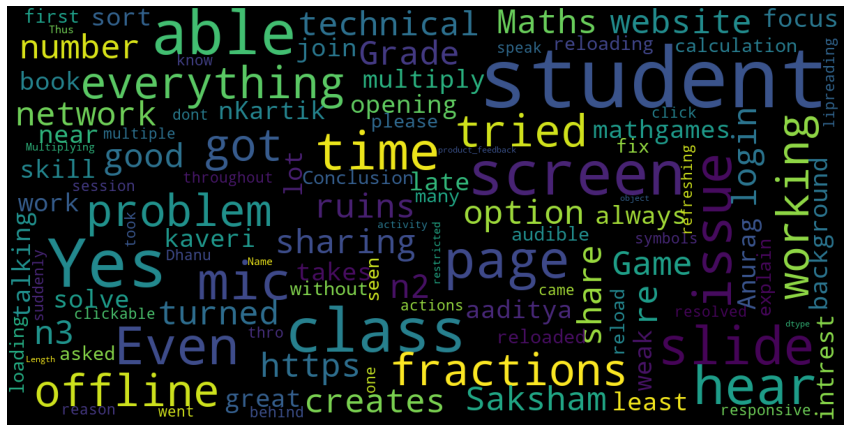

In [54]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(neg_df['product_feedback'])

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The shape of the tfidf is (503, 75), meaning that there are 503 cleaned_feedback and 75 tokens made through the filtering process.
Best Model's Params:  {'learning_decay': 0.5, 'learning_method': 'online', 'n_components': 5, 'random_state': 0}
Model Log Likelihood Score:  -1318.3257459301076
Model Perplexity:  134.47561197070513


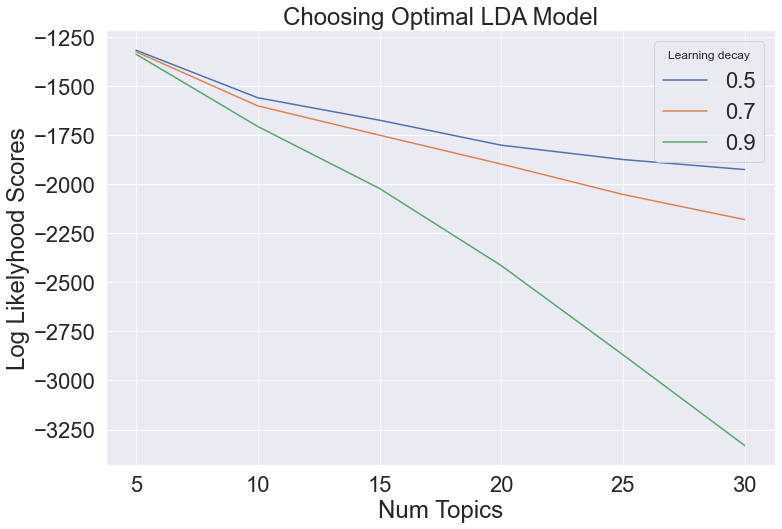

In [55]:
#def optimal_lda_model(df_review, review_colname):
df_review, review_colname = neg_df, 'cleaned_feedback'
'''
INPUTS:
    df_review - dataframe that contains the reviews
    review_colname: name of column that contains reviews
    
OUTPUTS:
lda_tfidf - Latent Dirichlet Allocation (LDA) model
dtm_tfidf - document-term matrix in the tfidf format
tfidf_vectorizer - word frequency in the reviews
A graph comparing LDA Model Performance Scores with different params
'''
docs_raw = df_review[review_colname].tolist()
#************   Step 1: Convert to document-term matrix   ************#

#Tansform text to vector form using the vectorizer object 
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10)                         # discard words that appear in < 10 reviews    

#aply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

#cnvert to document-term matrix
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)  

print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
          format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_colname, dtm_tfidf.shape[1]))

#*******   Step 2: GridSearch & parameter tuning to find the optimal LDA model   *******#

# efine Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                 'learning_decay': [.5, .7, .9],
                 'learning_method':['online'],
                 'random_state': [0]}

# nit the Model
lda = LatentDirichletAllocation()

# nit Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(dtm_tfidf)
#*****  Step 3: Output the optimal lda model and its parameters  *****#
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score: Higher the better
print("Model Log Likelihood Score: ", model.best_score_)
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Model Perplexity: ", best_lda_model.perplexity(dtm_tfidf))


#*********   Step 4: Compare LDA Model Performance Scores   ***********#

#Gt Log Likelyhoods from Grid Search Output
gscore=model.fit(dtm_tfidf).cv_results_
n_topics = [5, 10, 15, 20, 25, 30]

log_likelyhoods_5 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.5]
log_likelyhoods_7 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.7]
log_likelyhoods_9 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.9]

   # Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()
    
    #return best_lda_model, dtm_tfidf, tfidf_vectorizer
    
#best_lda_model, dtm_tfidf, tfidf_vectorizer = optimal_lda_model(neg_df, 'cleaned_feedback')

In [56]:
def display_topics(model, feature_names, n_top_words):
    '''
    INPUTS:
        model - the model we created
        feature_names - tells us what word each column in the matric represents
        n_top_words - number of top words to display
    OUTPUTS:
        a dataframe that contains the topics we created and the weights of each token
    '''
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        
        topic_dict["Topic %d words" % (topic_idx+1)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
        
        topic_dict["Topic %d weights" % (topic_idx+1)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
        
    return pd.DataFrame(topic_dict)


display_topics(best_lda_model, tfidf_vectorizer.get_feature_names(), n_top_words = 20) 

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights
0,class,30.5,issue,29.5,internet,17.5,screen,26.3,able,32.0
1,join,20.8,technical,21.2,poor,6.9,share,16.3,student,30.5
2,offline,19.3,drop,15.8,connection,6.7,load,12.3,slide,25.6
3,time,16.9,voice,15.5,slow,5.7,student,11.5,hear,25.0
4,parent,15.8,face,15.1,connectivity,4.0,able,8.8,network,18.2
5,student,15.3,student,15.0,student,2.9,slide,8.8,unable,15.8
6,able,13.1,tech,12.6,work,2.8,yes,6.7,issue,14.1
7,try,12.9,lot,12.1,disconnect,2.0,game,6.4,face,13.1
8,start,11.8,class,12.0,use,1.5,work,6.3,problem,10.0
9,dint,11.2,hear,11.8,class,1.4,leave,5.2,class,9.6


In [57]:
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.014534 -0.030495  1       1        31.455939
4     -0.181022 -0.033416  2       1        22.116635
1     -0.009492 -0.207985  3       1        21.751155
3     -0.064033  0.245047  4       1        15.090509
2      0.269081  0.026849  5       1        9.585762 , topic_info=        Term       Freq      Total Category  logprob  loglift
26  internet  27.000000  27.000000  Default  30.0000  30.0000
53  screen    29.000000  29.000000  Default  29.0000  29.0000
55  share     18.000000  18.000000  Default  28.0000  28.0000
0   able      49.000000  49.000000  Default  27.0000  27.0000
27  issue     41.000000  41.000000  Default  26.0000  26.0000
..    ...           ...        ...      ...      ...      ...
28  join      0.315875   22.799139  Topic5  -5.7778  -1.9342 
27  issue     0.314493   41.951299  Topic5  -5.7822  -2.5484 
56  slide     0.314277   38.982840  Topic5  -5.7829  -2.4757 
20  end       0.313089   14.818722  Topic5  -5.7866  -1.5123 
24  hear      0.312562   43.696010  Topic5  -5.7883  -2.5953 

[217 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0     1      0.220336  able    
0     2      0.580886  able    
0     4      0.180275  able    
1     1      0.300485  activity
1     2      0.701132  activity
...  ..           ...       ...
73    3      0.048568  work    
73    4      0.339978  work    
73    5      0.194273  work    
74    1      0.195502  yes     
74    4      0.684256  yes     

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

In [64]:
topic_dict = {0 : 'Class Joining issues', 1 : 'Slides and Network issues', 2 : 'Drop/Voice/Audio issues', 3 : 'Screen Sharing/Loading issues', 4 : 'Internet Connectivity issues',}

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
feature_names = tfidf_vectorizer.get_feature_names()
d = {}
for idx, topic in enumerate(best_lda_model.components_):
   d.update({topic_dict[idx] : {feature_names[i] for i in topic.argsort()[:-50 - 1:-1]}})
    

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
d

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Class Joining issues': {'able',
  'activity',
  'ask',
  'audio',
  'class',
  'cod',
  'come',
  'complete',
  'customer',
  'demo',
  'dint',
  'drop',
  'end',
  'explain',
  'hear',
  'interested',
  'issue',
  'join',
  'just',
  'lido',
  'load',
  'log',
  'login',
  'mic',
  'min',
  'minute',
  'mobile',
  'mode',
  'network',
  'offline',
  'parent',
  'platform',
  'problem',
  'refresh',
  'resolve',
  'say',
  'screen',
  'slide',
  'start',
  'student',
  'talk',
  'teach',
  'tell',
  'time',
  'try',
  'use',
  'video',
  'want',
  'work',
  'yes'},
 'Slides and Network issues': {'able',
  'attend',
  'audible',
  'camera',
  'child',
  'class',
  'cod',
  'come',
  'conclusion',
  'connectivity',
  'demo',
  'dint',
  'disconnect',
  'drop',
  'end',
  'face',
  'hear',
  'interested',
  'internet',
  'issue',
  'join',
  'just',
  'listen',
  'log',
  'login',
  'lot',
  'min',
  'minute',
  'network',
  'offline',
  'parent',
  'platform',
  'problem',
  'properly'

In [67]:
newdict = {i: k for k, v in d.items() for i in v}
df['Categories'] = df.sentence.str.findall('|'.join(newdict.keys())).str[0].map(newdict)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
categories_probability = best_lda_model.transform(dtm_tfidf)
categories_probability.shape

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(503, 5)

In [90]:
categories_probability

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.04877429, 0.41293365, 0.04499123, 0.44686212, 0.04643871],
       [0.64551783, 0.05942008, 0.05930914, 0.17596235, 0.05979061],
       [0.71897405, 0.06983025, 0.06924403, 0.06937908, 0.0725726 ],
       ...,
       [0.38230872, 0.39413159, 0.07420714, 0.07457017, 0.07478239],
       [0.56173092, 0.05686072, 0.05636666, 0.06144738, 0.26359431],
       [0.07117532, 0.0703796 , 0.07033067, 0.36098093, 0.42713349]])

In [93]:
mykeys = [np.argmax(p) for p in categories_probability] 
mykeys

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[3,
 0,
 0,
 0,
 3,
 4,
 0,
 0,
 4,
 4,
 4,
 1,
 0,
 1,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 1,
 1,
 4,
 4,
 4,
 0,
 4,
 4,
 3,
 0,
 3,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 3,
 3,
 4,
 3,
 0,
 1,
 0,
 3,
 1,
 4,
 4,
 0,
 0,
 0,
 3,
 4,
 4,
 0,
 3,
 0,
 4,
 0,
 3,
 0,
 3,
 0,
 4,
 1,
 0,
 1,
 0,
 4,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 4,
 4,
 0,
 3,
 0,
 4,
 0,
 0,
 4,
 3,
 1,
 0,
 4,
 3,
 1,
 0,
 1,
 1,
 4,
 0,
 0,
 4,
 4,
 1,
 3,
 0,
 1,
 4,
 1,
 0,
 4,
 4,
 0,
 0,
 2,
 4,
 4,
 4,
 2,
 4,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 4,
 0,
 2,
 1,
 4,
 1,
 0,
 4,
 3,
 0,
 3,
 0,
 4,
 0,
 4,
 4,
 1,
 2,
 2,
 0,
 0,
 3,
 1,
 3,
 3,
 0,
 4,
 4,
 3,
 4,
 0,
 0,
 3,
 4,
 1,
 0,
 4,
 3,
 4,
 1,
 0,
 1,
 0,
 0,
 2,
 4,
 4,
 0,
 1,
 4,
 3,
 1,
 0,
 3,
 1,
 4,
 0,
 4,
 1,
 4,
 1,
 0,
 0,
 1,
 4,
 4,
 4,
 4,
 3,
 0,
 4,
 0,
 0,
 3,
 2,
 4,
 0,
 0,
 4,
 0,
 0,
 4,
 3,
 0,
 3,
 4,
 1,
 0,
 4,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 4,
 0,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 0,
 1,
 1,
 4,
 4,
 4,
 2,
 0,
 1,
 0,
 4,
 0,


In [95]:
neg_df['Categories'] = [topic_dict[x] for x in mykeys]

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
neg_df.head()

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_feedback,product_rating,teacher_id,teacher_name,teacher_rmn,vc_id,start_time,count_students,student_ids,student_names,student_rmns,rating_with_NA,reviews_length,number_of_words,cleaned_feedback,sentence,sentiment,Sentiment_Type,Categories
0,"1. Most of the times the screen share option creates technical issues and ruins the class. (Even when network is good).\n2. Student (Saksham, Grade 7, Maths) had some issue after I tried sharing screen, he turned offline and was not able to re-login.\n3. Game website on slide number 10 - (https://in.mathgames.com/skill/7.8-multiply-fractions) always takes a lot of time in opening.",1.0,28e89e38-fb05-4082-84aa-1f9443d43383,Lalit Upadhyay,9004097187,4fc2f040-aaef-4e2e-9c9d-101d3f5b7bc6,2020-09-05T16:00:00+05:30,3,"{76dd93d7-0336-4e49-b3bd-1fe92e6ca289,9af94c6c-cba4-4ac2-aef7-9dadcad97547,ec4ec786-a17c-4a59-a1dd-e92b04bc88ce}","{Sachi,SAKSHAM,Tanesh}","{8018256529,8126414600,9027917598}",1,381,61,1 most of the time the screen share option create technical issue and ruin the class even when network be good 2 student wakeham grade 7 math have some issue after i try share screen he turn offline and be not able to religion 3 game webster on slide number 10 always take a lot of time in open,1 most of the time the screen share option create technical issue and ruin the class even when network be good 2 student wakeham grade 7 math have some issue after i try share screen he turn offline and be not able to religion 3 game webster on slide number 10 always take a lot of time in open,-0.882468,Negative,Screen Sharing/Loading issues
1,"aaditya tried everything but his mic did not work, kaveri was not near the screen but could hear her talking in the background",1.0,f09c9aef-c221-4858-b0b6-cfee341fa761,Vasundhara Guleria,8264861796,0c964071-5fc0-42a0-a6a9-d42cc59e0f61,2020-09-12T13:00:00+05:30,4,"{2543fa86-1748-4b31-a8ca-7040943f791e,5b471717-9223-4709-adec-32f6f983ca39,b4b390d5-47b8-4c6d-9bc1-de6e8bf418e7,dac7aeb6-9190-4828-a1ee-db81429a804d}","{ADITYA,AWADH,KAVERI,""Zara Khan ""}","{8387977000,9399073915,9587358465,9878138080}",1,128,23,aaditya try everything but his mic do not work tavern be not near the screen but could hear her talk in the background,aaditya try everything but his mic do not work tavern be not near the screen but could hear her talk in the background,-0.810417,Negative,Class Joining issues
2,"Anurag is having least intrest in this class, but he is more focus on class book problem. I solve some .\nKartik join late but great student , weak in some sort of calculation.",1.0,d73677b0-7f22-4028-8a76-1dcec5347ab4,Nirmal Kumar Singh,8982753944,cfc68463-3c65-4a9f-80fa-d0ad52ba136f,2020-09-09T18:00:00+05:30,3,"{5200eb31-49ec-4a2c-9170-4660d25e931b,523bf469-e88a-4bd7-ab94-bec8b5854d5d,689f7429-0f2e-4dd3-b659-98ef91f242ef}","{""Anurag "",""Ayan Ansari"",Karthik}","{7275767144,8979812304,9133095437}",1,175,34,aura be have least interest in this class but he be more focus on class book problem i solve some martin join late but great student weak in some sort of calculation,aura be have least interest in this class but he be more focus on class book problem i solve some martin join late but great student weak in some sort of calculation,-0.541781,Negative,Class Joining issues
4,"at first, my mic was not working so I asked to reload the page to my student and reloaded my page too. after that. Student's mic was not working even after reloading the page so many times",1.0,92d28ccc-442f-4b22-8b2b-59d4c08471de,Shafiq Ur Rehman,9999094192,9c54d54c-c94c-4b5a-a2d6-f8467972325b,2020-09-02T18:00:00+05:30,1,{6ec42414-9846-4be8-91d9-6390985169a1},{SANU},{7906733631},1,188,37,at first my mic be not work so i ask to reload the page to my student and reload my page too after that student mic be not work even after reload the page so many time,at first my mic be not work so i ask to reload the page to my student and reload my page too after that student mic be not work even after reload the page so man

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Categories', ylabel='count'>

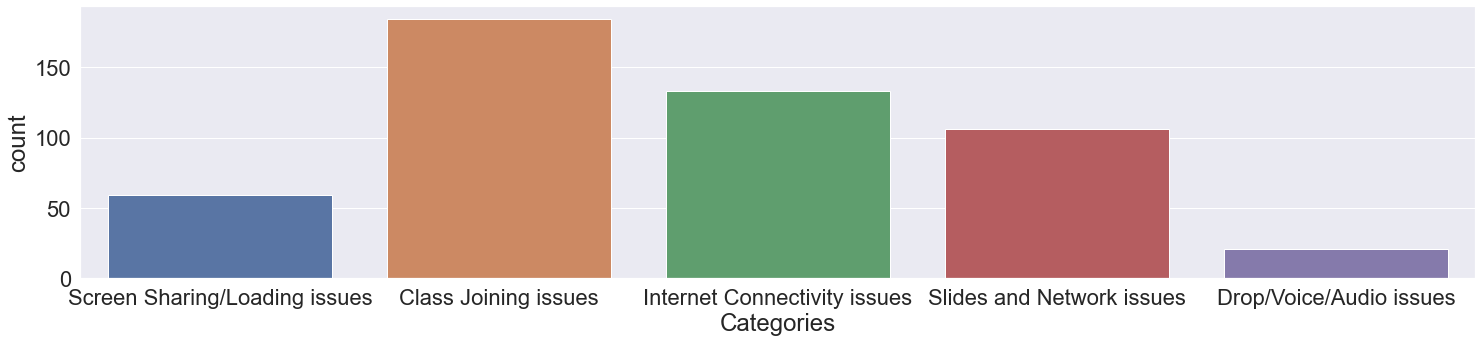

In [102]:
plt.figure(figsize=(25,5))
sns.countplot(neg_df['Categories'])